In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')

In [32]:
import seaborn as sns
print(sns.__version__)

0.12.2


In [33]:
import pandas as pd

In [34]:
covid_df = pd.read_csv('data/covid_df.csv')
covid_df['date'] = pd.to_datetime(covid_df['date'])
display(covid_df.head())

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines,death_rate,recover_rate
0,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [35]:
countries = ['Russia', 'Australia', 'Germany', 'Canada', 'United Kingdom']
croped_covid_df = covid_df[covid_df['country'].isin(countries)]

populations = pd.DataFrame([
    ['Canada', 37664517],
    ['Germany', 83721496],
    ['Russia', 145975300],
    ['Australia', 25726900],
    ['United Kingdom', 67802690]
    ],
    columns=['country', 'population']
)
croped_covid_df = croped_covid_df.merge(populations, on=['country'])
croped_covid_df['daily_confirmed_per_hundred'] = croped_covid_df['daily_confirmed'] / croped_covid_df['population'] * 100
croped_covid_df.head()

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines,death_rate,recover_rate,population,daily_confirmed_per_hundred
0,2020-01-23,Australia,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25726900,NaN
1,2020-01-25,Australia,4.0,0.0,0.0,4.0,4.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000016
2,2020-01-26,Australia,4.0,0.0,0.0,4.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000000
3,2020-01-27,Australia,5.0,0.0,0.0,5.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000004
4,2020-01-28,Australia,5.0,0.0,0.0,5.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000000


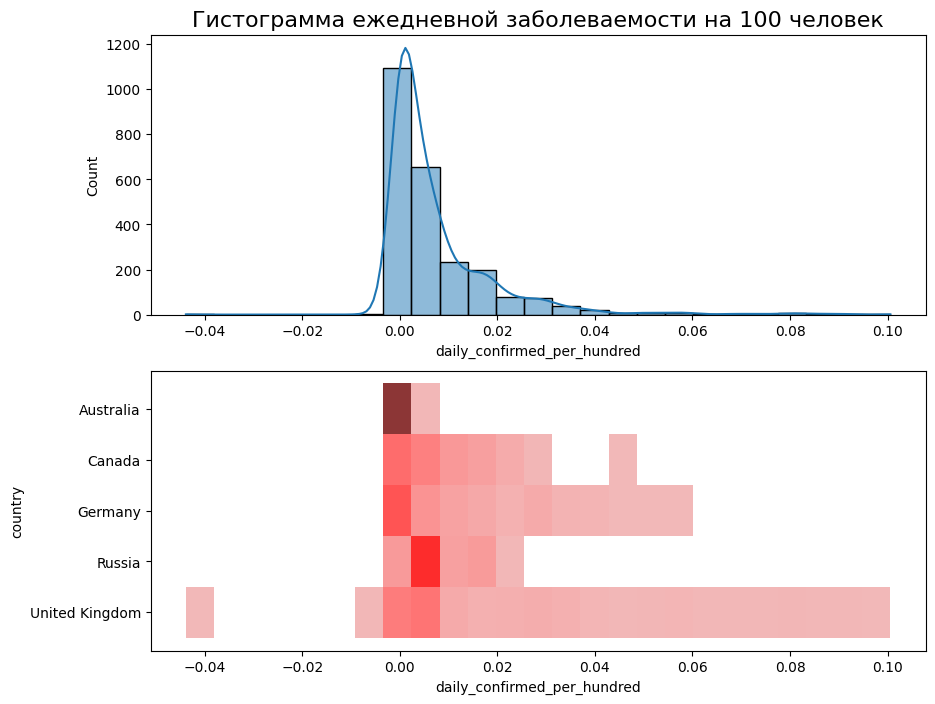

In [36]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
sns.histplot(
    data=croped_covid_df,
    x='daily_confirmed_per_hundred',
    bins=25,
    kde=True,
    ax=axes[0]
);
axes[0].set_title('Гистограмма ежедневной заболеваемости на 100 человек', fontsize=16)
sns.histplot(
    data=croped_covid_df,
    x='daily_confirmed_per_hundred',
    y='country',
    bins=25,
    color='red',
    ax=axes[1]
);

Общая гистограмма показывает, что ежедневная заболеваемость в выбранных странах не превышает 0.1 % от общего количества населения, причём большая часть наблюдений сосредоточена около 0. 

Также отчётливо видны аномалии — маленькие «пеньки», где заболеваемость отрицательная.

Гистограмма по странам показывает, какой вклад в общее распределение вносит заболеваемость в каждой из стран по отдельности. Например, ясно, что пик около нуля на общей гистограмме в основном задаётся Австралией, так как в ней ежедневная заболеваемость не превышала 0.005 % от общего числа населения (около 1.5 тыс. человек в день) и все наблюдения сосредоточены в двух интервалах. Чуть больший разброс по числу фиксируемых в день случаев имеет Россия, затем идут Канада, Германия и Великобритания.

Отличительной особенностью распределения для России и Великобритании является то, что для них характерен больший процент заболевших (самая тёмная отметка находится правее, чем у других стран).

Наконец, видно, что аномальная отрицательная заболеваемость принадлежит Великобритании. Об аномалиях, их поиске как с помощью визуализации, так и иными методами мы ещё будем говорить в модуле по очистке данных.

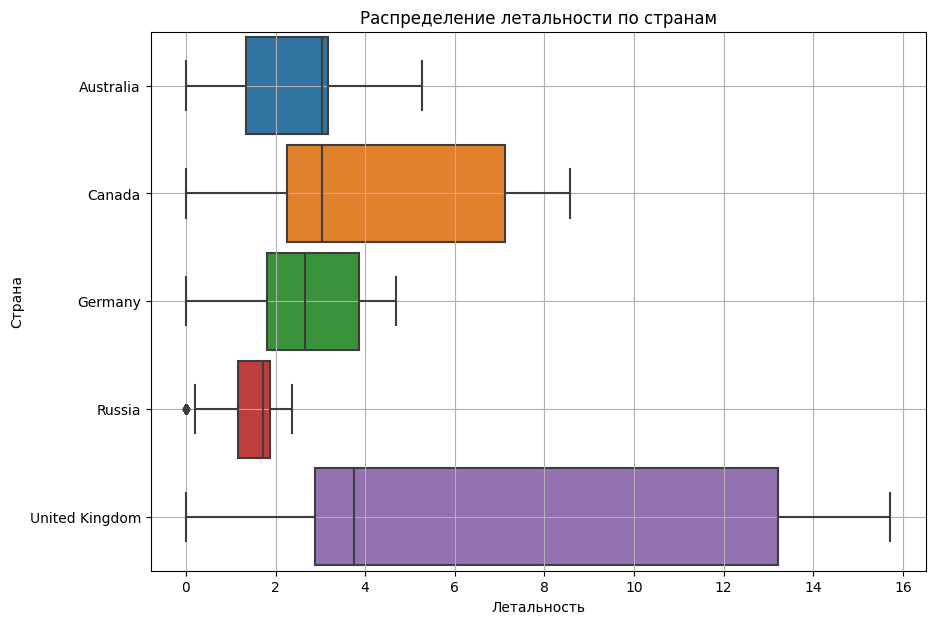

In [37]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=croped_covid_df,
    y='country',
    x='death_rate',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение летальности по странам');
boxplot.set_xlabel('Летальность');
boxplot.set_ylabel('Страна');
boxplot.grid()

Из выделенных стран наиболее стабильная во времени летальность от коронавируса — в России (ширина ящика наименьшая), она же является самой низкой (наименьшая медиана). Наибольший разброс имеет процент смертей в Великобритании, что объясняется вирусологами и британскими СМИ как неподготовленность страны к эпидемии в её начале, что приводило к высокой летальности. Однако, судя по тому что медианное значение летальности в стране практически совпадает со всеми остальными, можно сказать, что со временем обстановка стабилизировалась.

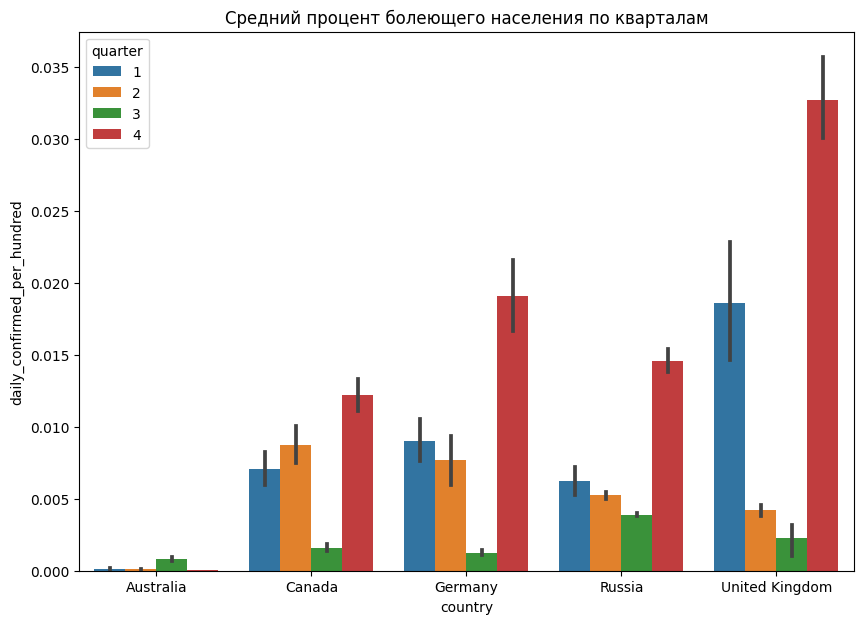

In [38]:
fig = plt.figure(figsize=(10, 7))
croped_covid_df['quarter'] = croped_covid_df['date'].dt.quarter
barplot = sns.barplot(
    data=croped_covid_df,
    x='country',
    y='daily_confirmed_per_hundred',
    hue='quarter',
)
barplot.set_title('Средний процент болеющего населения по кварталам');

Диаграмма показывает, как зависит средний ежедневный процент заболевших от страны и квартала. Отчётливо видно, что во всех странах (кроме Австралии), большинство людей заболевают в четвёртом квартале (октябрь, ноябрь, декабрь), когда иммунитет особенно ослаблен, а наименьшее число заболевших соответствует третьему кварталу (июль, август, сентябрь).

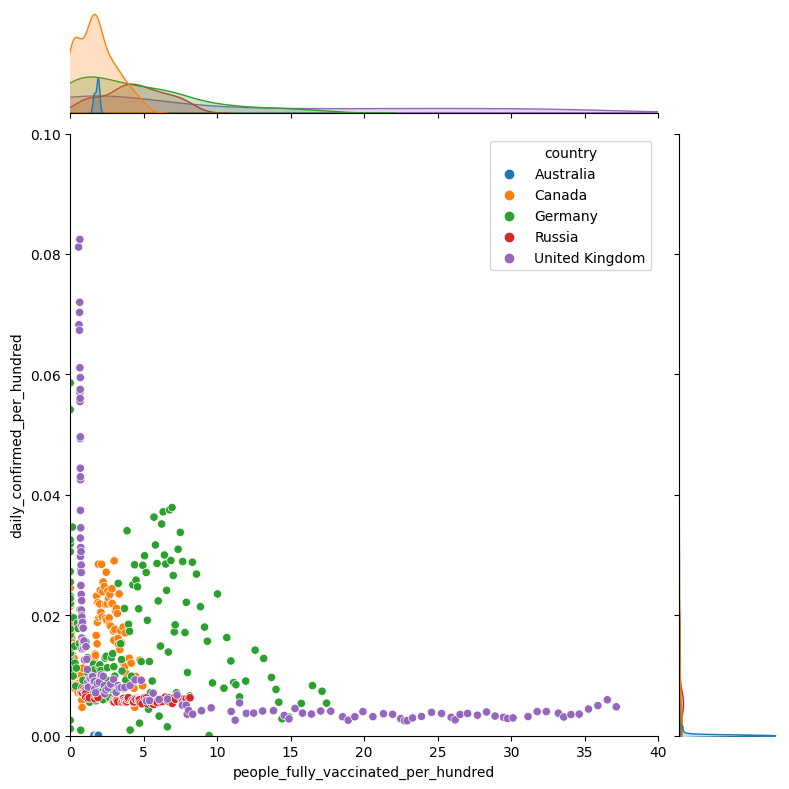

In [39]:
jointplot = sns.jointplot(
    data=croped_covid_df, 
    x='people_fully_vaccinated_per_hundred', 
    y='daily_confirmed_per_hundred',
    hue='country',
    xlim = (0, 40),
    ylim = (0, 0.1),
    height=8,
)

Из графика для Великобритании и России наблюдается следующая тенденция: с увеличением числа полностью привитых людей уменьшается ежедневное число заболевших. Для Канады и Германии такая же тенденция наблюдается только после достижения отметки в 7 % полностью привитого населения. Однако это может быть стечением обстоятельств, так как вирусологи говорят о необходимости полного вакцинирования 60 % населения в стране для снижения заболеваемости.

In [40]:
pivot = croped_covid_df.pivot_table(
    values='people_vaccinated_per_hundred',
    columns='date',
    index='country',
)
pivot.columns = pivot.columns.astype('string')
display(pivot)

date,2020-12-13,2020-12-14,2020-12-15,2020-12-16,2020-12-17,2020-12-18,2020-12-19,2020-12-20,2020-12-21,2020-12-22,...,2021-05-20,2021-05-21,2021-05-22,2021-05-23,2021-05-24,2021-05-25,2021-05-26,2021-05-27,2021-05-28,2021-05-29
country,,,,,,,,,,,,,,,,,,,,,
Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,12.40,12.69,12.88,13.28,13.73,14.18
Canada,NaN,0.0,0.00,0.01,0.02,0.03,0.03,0.03,0.05,0.07,...,48.10,49.25,50.14,50.89,51.77,52.39,53.05,53.95,54.99,55.71
Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39.18,39.68,39.95,40.11,40.29,40.64,41.29,41.87,42.40,42.61
Russia,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,NaN,0.04,...,10.20,10.30,10.50,10.53,10.70,10.81,11.07,11.12,11.19,11.29
United Kingdom,0.13,NaN,NaN,NaN,NaN,NaN,NaN,0.99,NaN,NaN,...,55.01,55.33,55.63,55.82,55.99,56.27,56.61,56.99,57.29,57.56


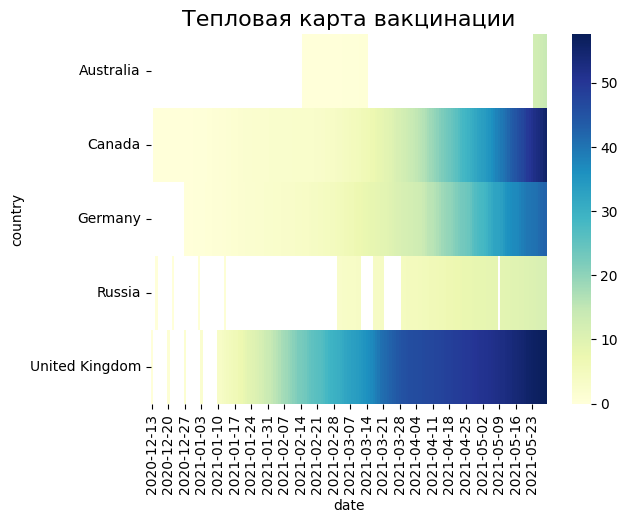

In [41]:
heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')
heatmap.set_title('Тепловая карта вакцинации', fontsize=16);

По тепловой карте легко можно понять, в каких странах темпы вакцинации выше, а в каких — ниже. Согласно легенде справа, чем ближе цвет полосы к синему, тем больше процент вакцинированных людей. Чем быстрее полоса переходит от блёклого жёлтого к насыщенному синему, тем выше темп вакцинации. Белые полосы обозначают отсутствие информации за данный период.

Так, можно судить, что наиболее активно кампания по вакцинации проходила в Великобритании, и на конец периода число вакцинированных первым компонентом людей в стране превысило отметку в 50 % от общего числа населения. В Канаде вакцинация населения вначале проходила медленнее, однако к концу периода наблюдений общий процент вакцинированных первым компонентом сравнялся с Великобританией.

Темпы вакцинации в России и Австралии гораздо ниже: здесь число привитых на конец периода составляет около 10 % от общего числа населения.

При этом с помощью тепловой карты мы смогли увидеть, что в данных о вакцинации в России, Великобритании и Австралии содержатся пропуски, и мы даже можем узнать, за какие периоды, посмотрев на ось абсцисс.

## Практика

6.4. Создайте новый признак confirmed_per_hundred, который покажет процентное отношение заболевших вирусом к общему числу населения в странах (confirted/population * 100).

Постройте тепловую карту, которая покажет, как росло число заболевших в процентах от общего числа населения (confirmed_per_hundred) в странах из таблицы croped_covid_df.

Выберите верные выводы по построенному графику:

* **A** Из представленных стран самые быстрые темпы роста относительной заболеваемости — в Великобритании.
* **B** Суммарное число заболевших в Австралии превышает 2 % от общего числа населения.
* **C** Интенсивность относительной заболеваемости в России выше, чем в Германии.
* **D** Из представленных стран самая низкая скорость распространения вируса — в Австралии.

In [42]:
croped_covid_df['confirmed_per_hundred'] = croped_covid_df['confirmed'] / croped_covid_df['population'] * 100
display(croped_covid_df.head())

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,...,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines,death_rate,recover_rate,population,daily_confirmed_per_hundred,quarter,confirmed_per_hundred
0,2020-01-23,Australia,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,25726900,NaN,1,0.000000
1,2020-01-25,Australia,4.0,0.0,0.0,4.0,4.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000016,1,0.000016
2,2020-01-26,Australia,4.0,0.0,0.0,4.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000000,1,0.000016
3,2020-01-27,Australia,5.0,0.0,0.0,5.0,1.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000004,1,0.000019
4,2020-01-28,Australia,5.0,0.0,0.0,5.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000000,1,0.000019


In [43]:
confirmed_per_hundred_pivot = croped_covid_df.pivot_table(
    values='confirmed_per_hundred',
    columns='date',
    index='country',
)
confirmed_per_hundred_pivot.columns = confirmed_per_hundred_pivot.columns.astype('string')
display(confirmed_per_hundred_pivot)

date,2020-01-23,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,...,2021-05-20,2021-05-21,2021-05-22,2021-05-23,2021-05-24,2021-05-25,2021-05-26,2021-05-27,2021-05-28,2021-05-29
country,,,,,,,,,,,,,,,,,,,,,
Australia,0.0,0.000016,0.000016,0.000019,0.000019,0.000019,0.000035,0.000035,0.000047,0.000047,...,0.116606,0.116621,0.116637,0.116683,0.116722,0.116788,0.116854,0.116897,0.116932,0.116983
Canada,NaN,NaN,0.000003,0.000003,0.000005,0.000005,0.000008,0.000008,0.000011,0.000011,...,3.599497,3.611526,3.620169,3.628017,3.632706,3.642529,3.648718,3.661252,3.669520,3.675536
Germany,NaN,NaN,NaN,NaN,0.000005,0.000005,0.000005,0.000006,0.000010,0.000012,...,4.345962,4.355632,4.363299,4.368845,4.371625,4.374704,4.380047,4.388347,4.395716,4.401106
Russia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000001,0.000001,0.000001,...,3.368999,3.375035,3.380916,3.386963,3.392637,3.397954,3.403604,3.409708,3.415960,3.422232
United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000003,0.000003,0.000003,...,6.594230,6.598223,6.601946,6.605033,6.608528,6.612093,6.616504,6.621495,6.627439,6.632219


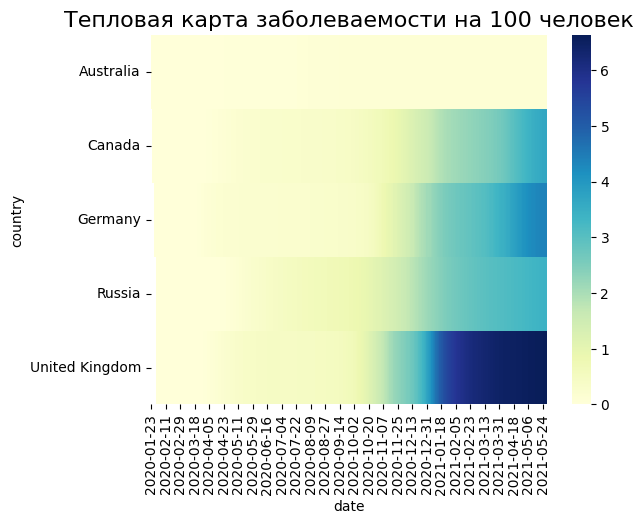

In [44]:
heatmap = sns.heatmap(data=confirmed_per_hundred_pivot, cmap='YlGnBu')
heatmap.set_title('Тепловая карта заболеваемости на 100 человек', fontsize=16);

6.5. Постройте коробчатую диаграмму для признака recover_rate (отношение выздоровлений к числу зафиксированных случаев заболевания в процентах).

Выберите верные выводы по данному графику:
* **A** График для Великобритании имеет «сплюснутый» в нуле вид, что указывает либо на практически полное отсутствие случаев выздоровления, либо, с точки зрения здравого смысла, на неверные данные о числе выздоровевших пациентов в этой стране.
* **B** Наибольший разброс по проценту ежедневных выздоровлений — в Канаде.
* **C** Наименьшая медиана — у Германии.
* **D** В четырёх из пяти стран на графике медианный процент ежедневных выздоровлений превышает 80 %.

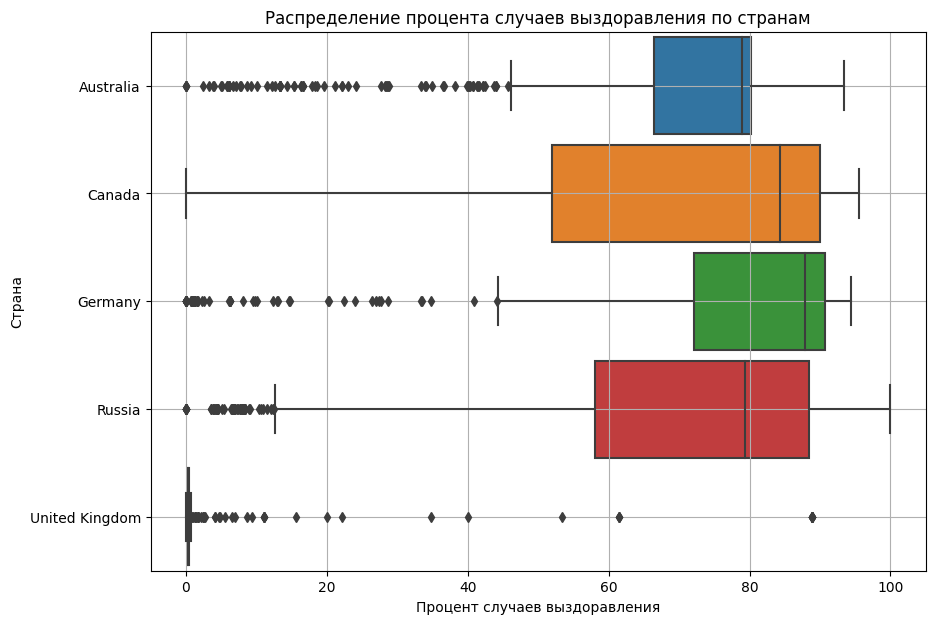

In [45]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=croped_covid_df,
    y='country',
    x='recover_rate',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение процента случаев выздоравления по странам');
boxplot.set_xlabel('Процент случаев выздоравления');
boxplot.set_ylabel('Страна');
boxplot.grid()